In [31]:
import pandas as pd

In [2]:
df1 = pd.read_csv("existence_label.csv")

In [4]:
q = df1.columns[1:14].to_list()
# q.append("num_ratings")

In [6]:
df2 = pd.DataFrame(df1, columns = q)

In [8]:
df2[df2>0] = 1

In [9]:
df2[df2 < 0] = 0

In [10]:
df2['total'] = df2.sum(1)

In [11]:
df2['num_raters'] = df1["num_ratings"].to_list()

In [12]:
df2["agreement"] = df2['total']/df2['num_raters']

In [22]:
r = []
for index, row in df2.iterrows():
    if row["agreement"] > 0.5:
        r.append(row["agreement"])
    else:
        r.append((1-row["agreement"]))
        

In [24]:
df2["agreement_change"] = r

In [30]:
df2["agreement_change"]

0      1.000000
1      0.666667
2      1.000000
3      1.000000
4      1.000000
         ...   
775    1.000000
776    0.714286
777    1.000000
778    0.750000
779    1.000000
Name: agreement_change, Length: 780, dtype: float64

<AxesSubplot:ylabel='Frequency'>

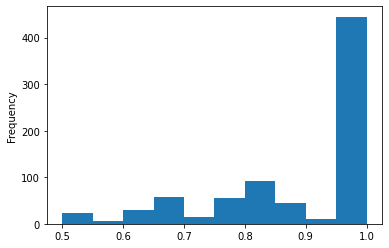

In [26]:
df2["agreement_change"].plot(kind = "hist")

In [28]:
import numpy as np
np.mean(df2["agreement_change"])

0.888074108939494

<AxesSubplot:ylabel='Frequency'>

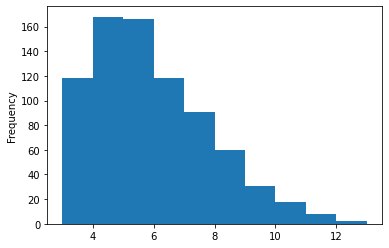

In [29]:
df2["num_raters"].plot(kind = "hist")

In [57]:
sub = []
for index, row in df2.iterrows():
    if row["num_raters"] >= 13:
        sub.append(row["agreement_change"])

In [55]:
sub

[0.5384615384615384, 1.0]

In [39]:
np.mean(np.array(sub)) # number of raters >= 8

0.8973204899675488

In [42]:
np.mean(np.array(sub)) # number of raters >= 7

0.8989578014578015

In [45]:
np.mean(np.array(sub)) # number of raters >= 9

0.8797650560362424

In [48]:
np.mean(np.array(sub)) # number of raters >= 10

0.8815684315684316

In [51]:
np.mean(np.array(sub)) # number of raters >= 11

0.9083916083916084

In [53]:
np.mean(np.array(sub)) # number of raters >= 12

0.7692307692307692

In [58]:
np.mean(np.array(sub)) # number of raters >= 13

0.7692307692307692

In [61]:
at_least_agreement = {}
for i in range(14):
    sub = []
    for index, row in df2.iterrows():
        if row["num_raters"] >= i:
            sub.append(row["agreement_change"])
            at_least_agreement["agreement level of number of raters is at least {}".format(i)] = np.mean(np.array(sub))

In [63]:
at_least_agreement

{'agreement level of number of raters is at least 0': 0.8880741089394936,
 'agreement level of number of raters is at least 1': 0.8880741089394936,
 'agreement level of number of raters is at least 2': 0.8880741089394936,
 'agreement level of number of raters is at least 3': 0.8880741089394936,
 'agreement level of number of raters is at least 4': 0.8892716087202492,
 'agreement level of number of raters is at least 5': 0.8905826011595243,
 'agreement level of number of raters is at least 6': 0.8961823322341615,
 'agreement level of number of raters is at least 7': 0.8989578014578015,
 'agreement level of number of raters is at least 8': 0.8973204899675488,
 'agreement level of number of raters is at least 9': 0.8797650560362424,
 'agreement level of number of raters is at least 10': 0.8815684315684316,
 'agreement level of number of raters is at least 11': 0.9083916083916084,
 'agreement level of number of raters is at least 12': 0.7692307692307692,
 'agreement level of number of rate

In [64]:
at_least_agreement = {}
for i in range(14):
    sub = []
    for index, row in df2.iterrows():
        if row["num_raters"] == i:
            sub.append(row["agreement_change"])
            at_least_agreement["agreement level of number of raters is {}".format(i)] = np.mean(np.array(sub))

In [65]:
at_least_agreement

{'agreement level of number of raters is 3': 0.8813559322033898,
 'agreement level of number of raters is 4': 0.8854166666666666,
 'agreement level of number of raters is 5': 0.8795180722891566,
 'agreement level of number of raters is 6': 0.8912429378531073,
 'agreement level of number of raters is 7': 0.9010989010989009,
 'agreement level of number of raters is 8': 0.9145833333333333,
 'agreement level of number of raters is 9': 0.8781362007168458,
 'agreement level of number of raters is 10': 0.8666666666666667,
 'agreement level of number of raters is 11': 0.9431818181818182,
 'agreement level of number of raters is 13': 0.7692307692307692}